# Data Preprocess

In [1]:
import pandas as pd
import os
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
# get path
os.getcwd()

'/Users/whj/Documents/hERG_ChEMBL240/Data_prepropress'

## 1. Import Raw_data

In [3]:
df1 = pd.read_excel('/Users/whj/Documents/hERG_ChEMBL240/Data/Raw_FDA_50_drugs.xlsx')
df1.head()

,Canonical_smiles,FDA_drug,hERG IC50 (μM)
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,245.00
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,3.31
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,10.00
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,1.10
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,7.24


In [4]:
df1_2 = df1  
len(df1_2)

50

There are 50 FDA drugs.

## 2. Make different threshold datasets

In [5]:
df1_2.loc[df1_2['hERG IC50 (μM)'] <= 1, 'ClassA'] = '1'
df1_2.loc[df1_2['hERG IC50 (μM)'] > 1, 'ClassA'] = '0'

df1_2.loc[df1_2['hERG IC50 (μM)'] <= 1, 'ClassB'] = '1'
df1_2.loc[df1_2['hERG IC50 (μM)'] > 10, 'ClassB'] = '0'

df1_2.loc[df1_2['hERG IC50 (μM)'] <= 1, 'ClassC'] = '1'
df1_2.loc[df1_2['hERG IC50 (μM)'] > 20, 'ClassC'] = '0'

df1_2.loc[df1_2['hERG IC50 (μM)'] <= 1, 'ClassD'] = '1'
df1_2.loc[df1_2['hERG IC50 (μM)'] > 30, 'ClassD'] = '0'

df1_2.loc[df1_2['hERG IC50 (μM)'] <= 1, 'ClassE'] = '1'
df1_2.loc[df1_2['hERG IC50 (μM)'] > 40, 'ClassE'] = '0'

df1_2.head()

,Canonical_smiles,FDA_drug,hERG IC50 (μM),ClassA,ClassB,ClassC,ClassD,ClassE
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,245.00,0,0,0,0,0
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,3.31,0,NaN,NaN,NaN,NaN
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,10.00,0,NaN,NaN,NaN,NaN
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,1.10,0,NaN,NaN,NaN,NaN
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,7.24,0,NaN,NaN,NaN,NaN


## Output total atom number of molecules distributation and note total atom number of molecules >=45 

36
0


,Canonical_smiles,FDA_drug,hERG IC50 (μM),ClassA,ClassB,ClassC,ClassD,ClassE,Delete
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,245.00,0,0,0,0,0,0
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,3.31,0,NaN,NaN,NaN,NaN,0
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,10.00,0,NaN,NaN,NaN,NaN,0
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,1.10,0,NaN,NaN,NaN,NaN,0
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,7.24,0,NaN,NaN,NaN,NaN,0


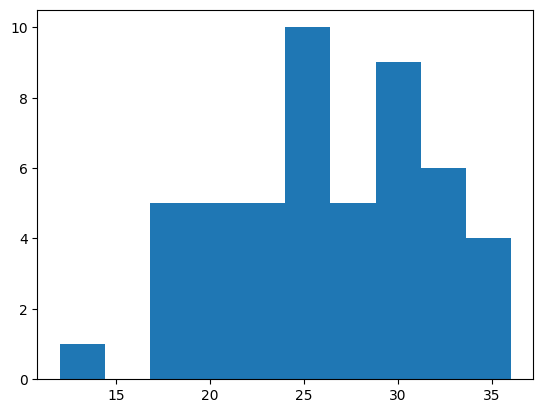

In [6]:
dataheader = ['Delete']
df1_2['Delete']='0'
max_atom = 0
atom_num_lis = []
cnt = 0 #calculate atom number bigger than 45
for i, word in enumerate(df1_2['Canonical_smiles']):
    mol = Chem.MolFromSmiles(word) #smile to molecule
    num_atom = mol.GetNumAtoms() #get all the number of a atom
    atom_num_lis.append(num_atom) # use a list to collect
    if num_atom > 45:
        df_rdm.iloc[i,-1]='1'
        print(i,word)
        cnt += 1
    if num_atom > max_atom:
        max_atom = num_atom
print(max_atom)
plt.hist(atom_num_lis)
print(cnt) # atom > 45
df1_2.head()

In [7]:
# remove total atom number of molecule more than 45
df2_ = df1_2[df1_2["Delete"].isin(["0"])]
df2 = df2_.drop(['Delete'], axis=1)
df2.head()

,Canonical_smiles,FDA_drug,hERG IC50 (μM),ClassA,ClassB,ClassC,ClassD,ClassE
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,245.00,0,0,0,0,0
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,3.31,0,NaN,NaN,NaN,NaN
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,10.00,0,NaN,NaN,NaN,NaN
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,1.10,0,NaN,NaN,NaN,NaN
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,7.24,0,NaN,NaN,NaN,NaN


In [8]:
len(df2)

50

In [9]:
# add murcko core structure
muko_lis = []
for i, word in enumerate(df2['Canonical_smiles']):
    muko = MurckoScaffold.MurckoScaffoldSmilesFromSmiles(word)
    muko_lis.append(muko)
df2['Murcko'] = muko_lis
df2.head()

,Canonical_smiles,FDA_drug,hERG IC50 (μM),ClassA,ClassB,ClassC,ClassD,ClassE,Murcko
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,245.00,0,0,0,0,0,c1cncc(C2CCCN2)c1
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,3.31,0,NaN,NaN,NaN,NaN,O=c1[nH]c(-c2cccc(S(=O)(=O)N3CCNCC3)c2)nc2cn[n...
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,10.00,0,NaN,NaN,NaN,NaN,C1=CC(c2ccccc2)C=CN1
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,1.10,0,NaN,NaN,NaN,NaN,O=C1CCc2cc(N3CCN(C(=O)c4ccccc4)CC3)ccc2N1
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,7.24,0,NaN,NaN,NaN,NaN,O=C(OC1CC2CCC(C1)N2)c1ccccc1


There are 50 molecules after removing 

In [10]:
# save all dataset in csv
df2.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_all_class.csv')

In [11]:
# create a dataset for ClassA': IC50 <= 1 μM and IC50 > 1 μM
df3a_ = df2[['Canonical_smiles', 'FDA_drug', 'Murcko', 'hERG IC50 (μM)', 'ClassA']]
df3a = df3a_.dropna(axis=0, how='any', subset=None, inplace=False)
df3a.head()

,Canonical_smiles,FDA_drug,Murcko,hERG IC50 (μM),ClassA
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,c1cncc(C2CCCN2)c1,245.00,0
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,Sildenafil,O=c1[nH]c(-c2cccc(S(=O)(=O)N3CCNCC3)c2)nc2cn[n...,3.31,0
2,CCOC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)[N+](=O)[O-]...,Nitrendipine,C1=CC(c2ccccc2)C=CN1,10.00,0
3,COC1=C(C=C(C=C1)C(=O)N2CCN(CC2)C3=CC4=C(C=C3)N...,Vesnarinone,O=C1CCc2cc(N3CCN(C(=O)c4ccccc4)CC3)ccc2N1,1.10,0
4,CN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)OC(=O)C3=CC=C...,Cocaine,O=C(OC1CC2CCC(C1)N2)c1ccccc1,7.24,0


In [12]:
# save dataset for ClassA
df3a.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_1_1.csv')

In [13]:
# create a dataset for ClassB': IC50 <= 1 μM and IC50 > 10 μM 
df3b_ = df2[['Canonical_smiles', 'FDA_drug', 'Murcko', 'hERG IC50 (μM)', 'ClassB']]
df3b = df3b_.dropna(axis=0, how='any', subset=None, inplace=False)
df3b.head()

,Canonical_smiles,FDA_drug,Murcko,hERG IC50 (μM),ClassB
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,c1cncc(C2CCCN2)c1,245.000,0
6,CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42,Clozapine,c1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2,0.324,1
11,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,Quinidine,c1ccc2c(CC3CC4CCN3CC4)ccnc2c1,0.324,1
14,CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C...,Risperidone,O=c1c(CCN2CCC(c3noc4ccccc34)CC2)cnc2n1CCCC2,0.151,1
15,CC(C)C(CCCN(C)CCC1=CC(=C(C=C1)OC)OC)(C#N)C2=CC...,Verapamil,c1ccc(CCCCNCCc2ccccc2)cc1,0.141,1


In [14]:
# save dataset for ClassB
df3b.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_1_10.csv.csv')

In [15]:
# create a dataset for ClassC': IC50 <= 1 μM and IC50 > 20 μM
df3c_ = df2[['Canonical_smiles', 'FDA_drug', 'Murcko', 'hERG IC50 (μM)', 'ClassC']]
df3c = df3c_.dropna(axis=0, how='any', subset=None, inplace=False)
df3c.head()

,Canonical_smiles,FDA_drug,Murcko,hERG IC50 (μM),ClassC
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,c1cncc(C2CCCN2)c1,245.000,0
6,CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42,Clozapine,c1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2,0.324,1
11,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,Quinidine,c1ccc2c(CC3CC4CCN3CC4)ccnc2c1,0.324,1
14,CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C...,Risperidone,O=c1c(CCN2CCC(c3noc4ccccc34)CC2)cnc2n1CCCC2,0.151,1
15,CC(C)C(CCCN(C)CCC1=CC(=C(C=C1)OC)OC)(C#N)C2=CC...,Verapamil,c1ccc(CCCCNCCc2ccccc2)cc1,0.141,1


In [16]:
# save dataset for ClassC
df3c.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_1_20.csv')

In [17]:
# create a dataset for ClassD': IC50 <= 1 μM and IC50 > 30 μM
df3d_ = df2[['Canonical_smiles', 'FDA_drug', 'Murcko', 'hERG IC50 (μM)', 'ClassD']]
df3d = df3d_.dropna(axis=0, how='any', subset=None, inplace=False)
df3d.head()

,Canonical_smiles,FDA_drug,Murcko,hERG IC50 (μM),ClassD
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,c1cncc(C2CCCN2)c1,245.000,0
6,CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42,Clozapine,c1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2,0.324,1
11,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,Quinidine,c1ccc2c(CC3CC4CCN3CC4)ccnc2c1,0.324,1
14,CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C...,Risperidone,O=c1c(CCN2CCC(c3noc4ccccc34)CC2)cnc2n1CCCC2,0.151,1
15,CC(C)C(CCCN(C)CCC1=CC(=C(C=C1)OC)OC)(C#N)C2=CC...,Verapamil,c1ccc(CCCCNCCc2ccccc2)cc1,0.141,1


In [18]:
# save dataset for ClassD
df3d.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_1_30.csv')

In [19]:
# create a dataset for ClassD': IC50 <= 1 μM and IC50 > 40 μM
df3e_ = df2[['Canonical_smiles', 'FDA_drug', 'Murcko', 'hERG IC50 (μM)', 'ClassE']]
df3e = df3e_.dropna(axis=0, how='any', subset=None, inplace=False)
df3e.head()

,Canonical_smiles,FDA_drug,Murcko,hERG IC50 (μM),ClassE
0,CN1CCC[C@H]1C2=CN=CC=C2,Nicotine,c1cncc(C2CCCN2)c1,245.000,0
6,CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42,Clozapine,c1ccc2c(c1)N=C(N1CCNCC1)c1ccccc1N2,0.324,1
11,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,Quinidine,c1ccc2c(CC3CC4CCN3CC4)ccnc2c1,0.324,1
14,CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C...,Risperidone,O=c1c(CCN2CCC(c3noc4ccccc34)CC2)cnc2n1CCCC2,0.151,1
15,CC(C)C(CCCN(C)CCC1=CC(=C(C=C1)OC)OC)(C#N)C2=CC...,Verapamil,c1ccc(CCCCNCCc2ccccc2)cc1,0.141,1


In [20]:
# save dataset for ClassE
df3e.to_csv('/Users/whj/Documents/hERG_ChEMBL240/Data/FDA_drugs/FDA_1_40.csv')